In [15]:
# Basic librairies (all the librairies used for the machine learning are imported in the tools.py file)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ardl import ARDL
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline

from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
from DreamLib.processing_datas import *
from DreamLib.timeseries import *
import datas.selected_columns as cl

In [12]:
# Data importation
data = pd.read_sas("datas/construct_red.sas7bdat")
# Useful to plot the model 
index = data.set_index('TRIMESTRE').index.unique()

# Functions

### General

In [4]:
dft = data[data.CHRONIQUE == b'Totale']
dft.set_index(dft.TRIMESTRE,inplace=True)

Yt = dft['DR']

dft = dft.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df = dft.astype('float64', copy=True)
y = Yt.astype('float64', copy=True)

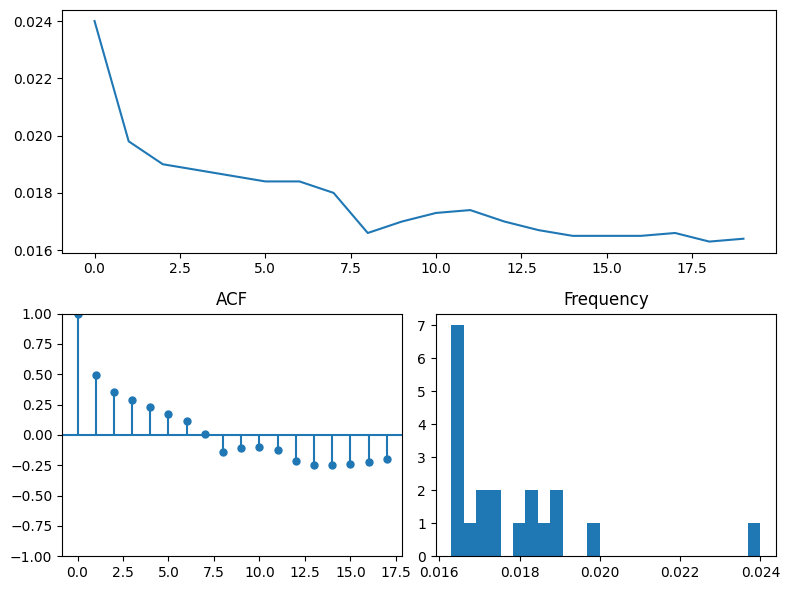

In [8]:

start=0
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_corr,split=0.2,norm='Not')

from pmdarima.utils import tsdisplay

tsdisplay(y_train, lag_max=17)

In [13]:
fit1 = pm.auto_arima(y_train, m=12, trace=True, suppress_warnings=True)
fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-75.916, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-72.551, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-69.663, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-66.937, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-73.916, Time=0.09 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-73.916, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=-71.916, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-74.551, Time=0.13 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-71.663, Time=0.19 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-71.172, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 3.443 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   20
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                  39.958
Date:                  Tue, 06 Dec 2022   AIC                            -75.916
Time:                          21:58:15   BIC                            -75.757
Sample:                      12-31-2008   HQIC                           -76.988
                           - 09-30-2013                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0028      0.002     -1.590      0.112      -0.006       0.001
sigma2      2.686e-06   2.77e-06      0.971      0.331   -2.73e-06    8.11e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 7.14
Prob(Q):                              0.53   Prob(JB):                         0.03
Heteroskedasticity (H):               0.17   Skew:                            -1.98
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

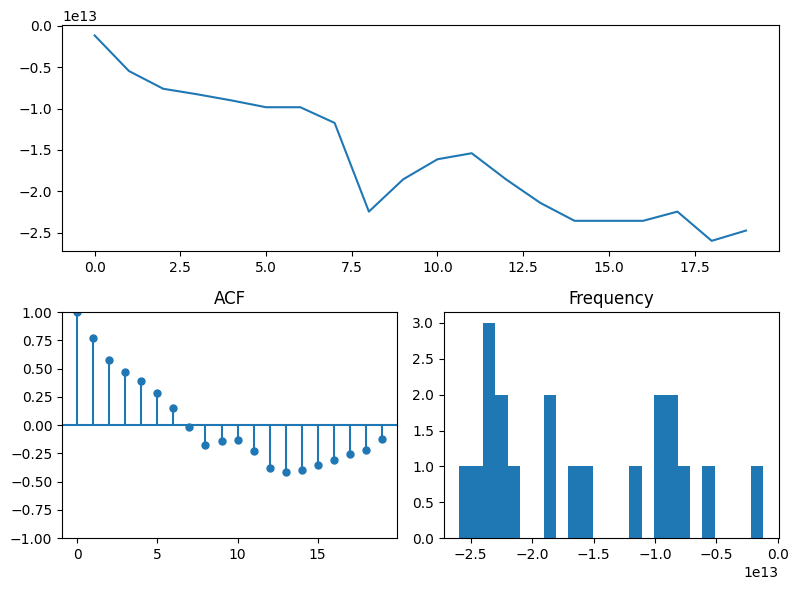

In [14]:
y_train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y_train)
tsdisplay(y_train_bc, lag_max=19)

In [16]:
fit2 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=12))
])

fit2.fit(y_train)
fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=475.564, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=474.560, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=475.677, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=514.979, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=477.839, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=475.417, Time=0.43 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=475.183, Time=0.18 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=473.275, Time=0.07 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=475.066, Time=0.14 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=476.752, Time=0.25 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=476.830, Time=0.03 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=473.744, Time=0.22 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   20
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -232.637
Date:                              Tue, 06 Dec 2022   AIC                            473.275
Time:                                      21:58:48   BIC                            473.593
Sample:                                           0   HQIC                           471.132
                                               - 20                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.481e+13        nan        nan        nan         nan         nan
ar.L1         -0.1311      0.179     -0.732      0.464      -0.482       0.220
ma.S.L12      -0.4749      1.519     -0.313      0.755      -3.453       2.503
sigma2      1.815e+24   5.01e-25   3.62e+48      0.000    1.81e+24    1.81e+24
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.11   Prob(JB):                         0.92
Heteroskedasticity (H):              10.82   Skew:                             0.35
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+65. Standard errors may be unstable.
"""

# Focus on chronique total

In [17]:
start = 2

## With col_totale_corr

In [18]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



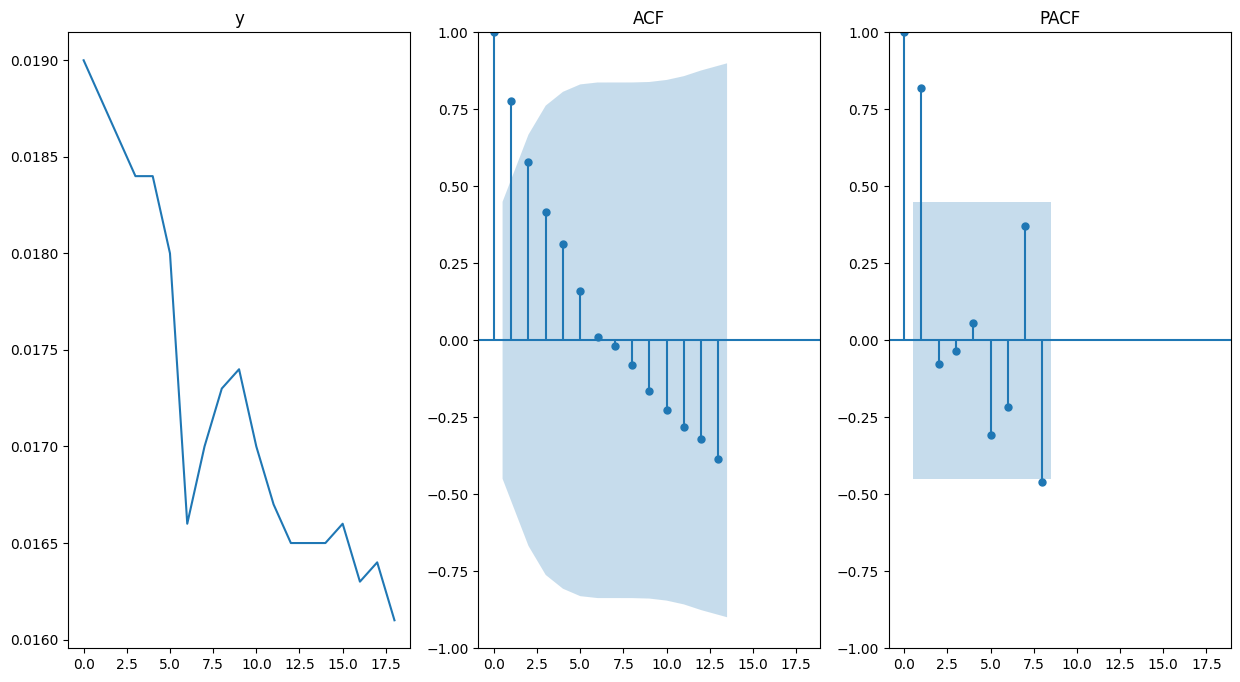

0

In [20]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-350.485, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-362.572, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-360.572, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-355.116, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-360.572, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.234 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                        SARIMAX   Log Likelihood                 201.286
Date:             

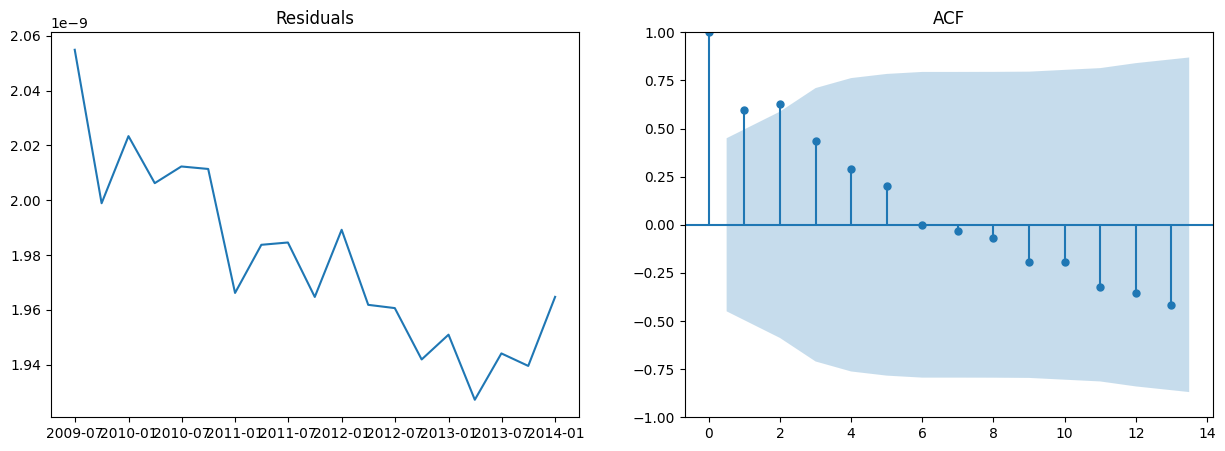


Test statistic for the residuals: -1.375
P-value for the residuals: 0.59431
The residuals are not stationary. We accept the hypothesis of a unit root.



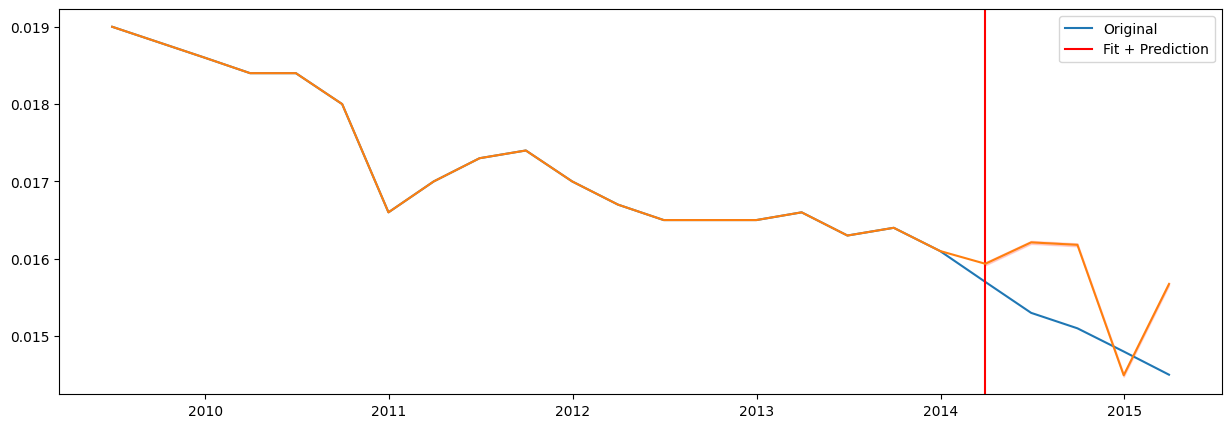

In [21]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

## With col_totale_low_var

In [24]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-324.928, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-334.572, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-332.248, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-332.333, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-330.142, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-332.572, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.289 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                        SARIMAX   Log Likelihood                 201.286
Date:        

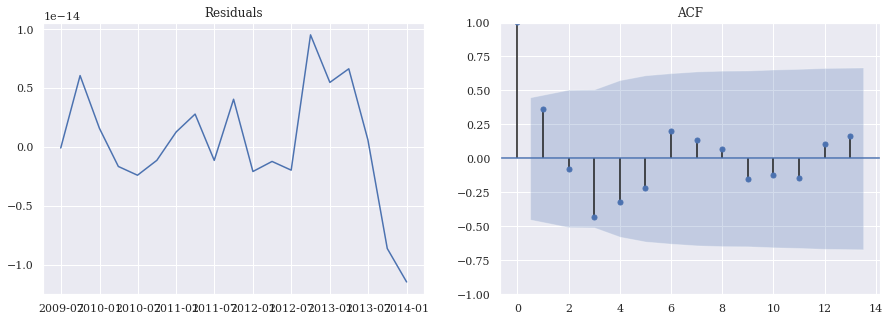


Test statistic for the residuals: -1.701
P-value for the residuals: 0.43082
The residuals are not stationary. We accept the hypothesis of a unit root.



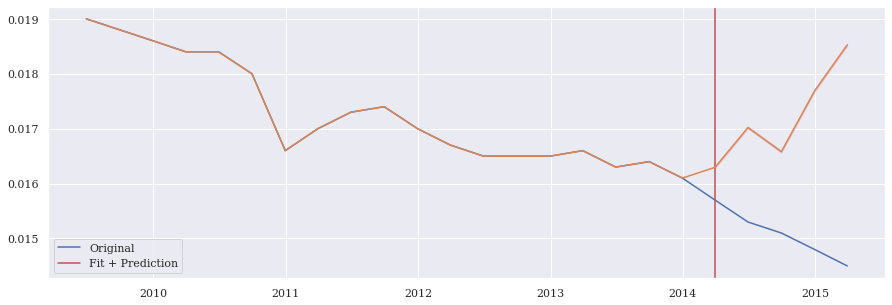

In [25]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_kbest

In [26]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-349.637, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-360.572, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-357.720, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-358.541, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-355.502, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-358.572, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.849 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                        SARIMAX   Log Likelihood                 201.286
Date:        

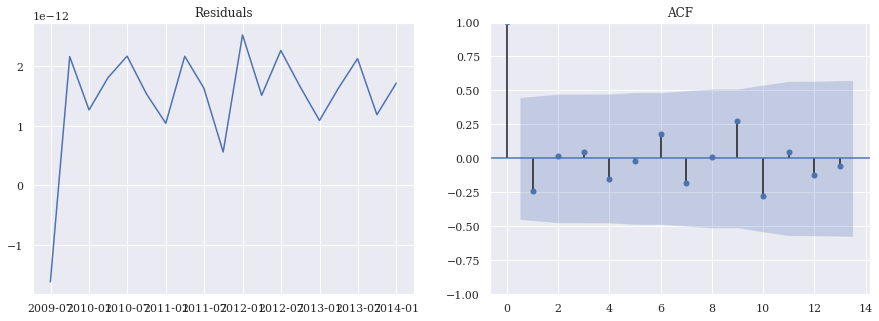


Test statistic for the residuals: -4.708
P-value for the residuals: 8e-05
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



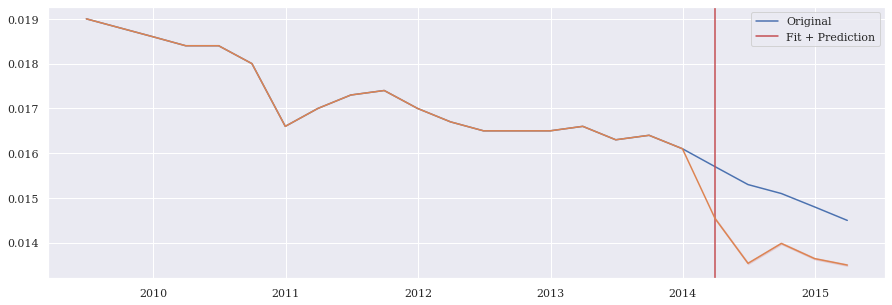

In [27]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_recur

In [28]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-340.572, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-348.572, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-342.976, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-346.563, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-340.274, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.817 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                        SARIMAX   Log Likelihood                 201.286
Date:              

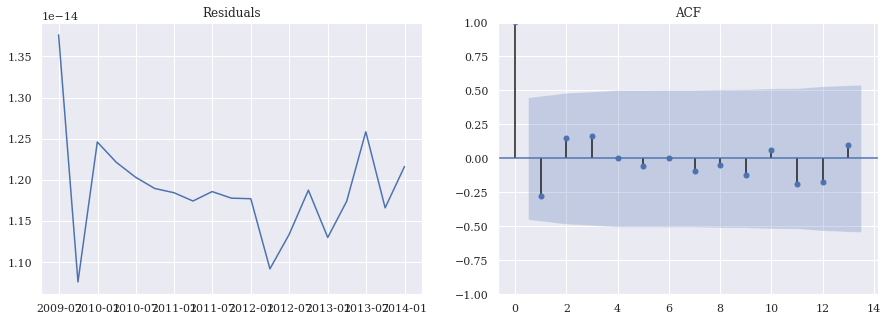


Test statistic for the residuals: -0.667
P-value for the residuals: 0.85522
The residuals are not stationary. We accept the hypothesis of a unit root.



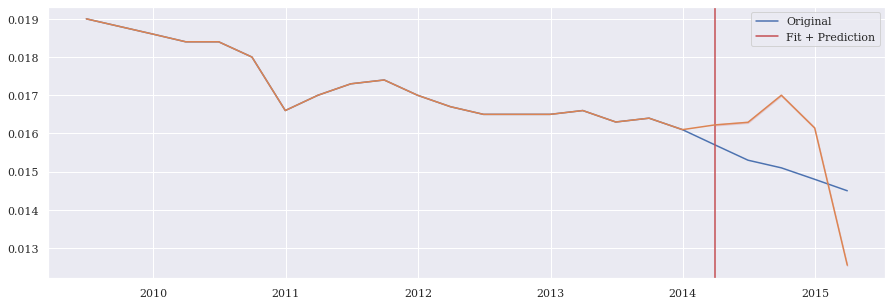

In [29]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_sfm

In [30]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-270.735, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-260.881, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-304.391, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-311.371, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-308.480, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-295.357, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-280.808, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.129 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. 

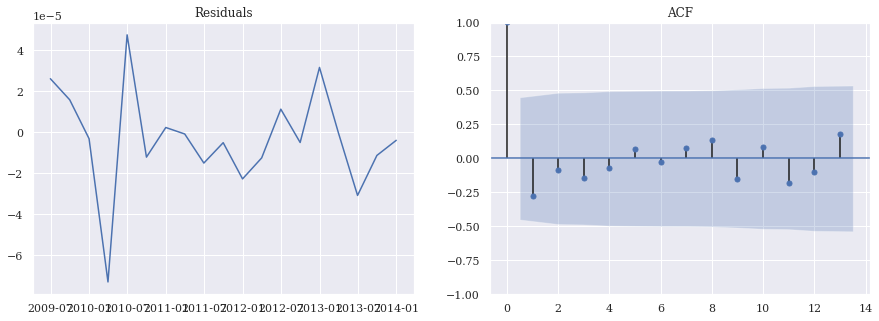


Test statistic for the residuals: -5.558
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



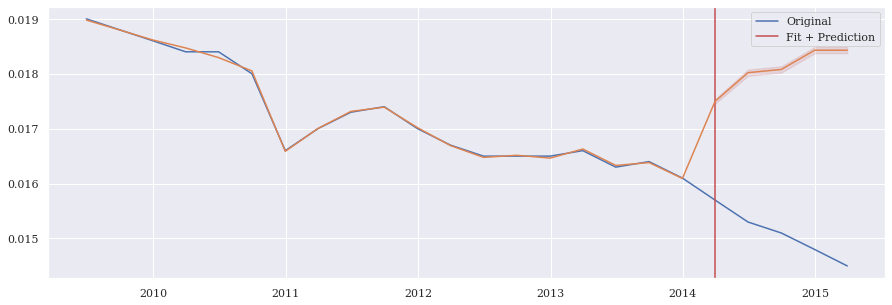

In [31]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_tree

In [32]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-343.387, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-352.572, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-350.281, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-350.333, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-348.154, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-350.572, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.703 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                        SARIMAX   Log Likelihood                 201.286
Date:        

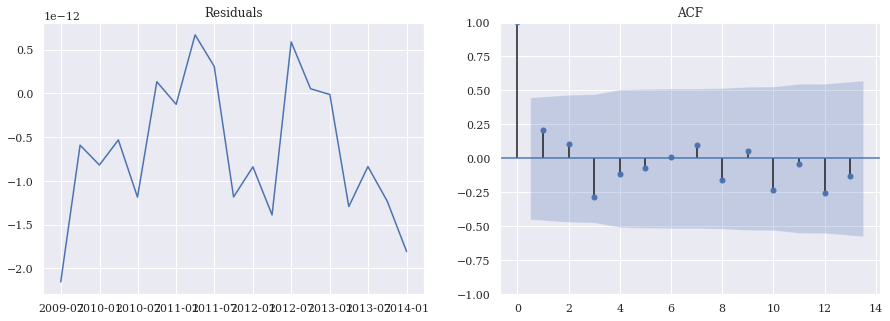


Test statistic for the residuals: -3.357
P-value for the residuals: 0.01251
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



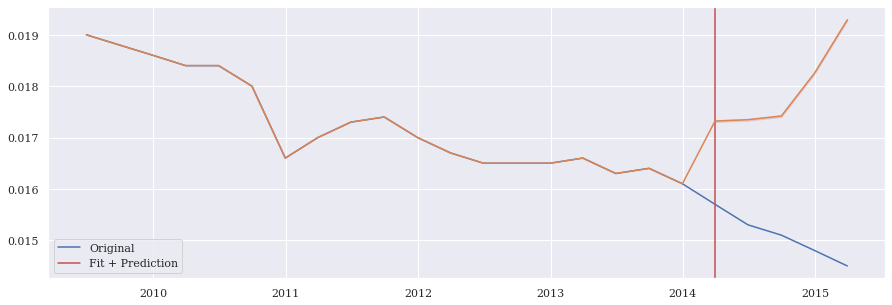

In [33]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_seq_for

In [34]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-216.033, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-189.988, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-226.227, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-227.370, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-204.437, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-229.474, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-227.066, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-204.751, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-204.831, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-227.918, Time=0.19 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 

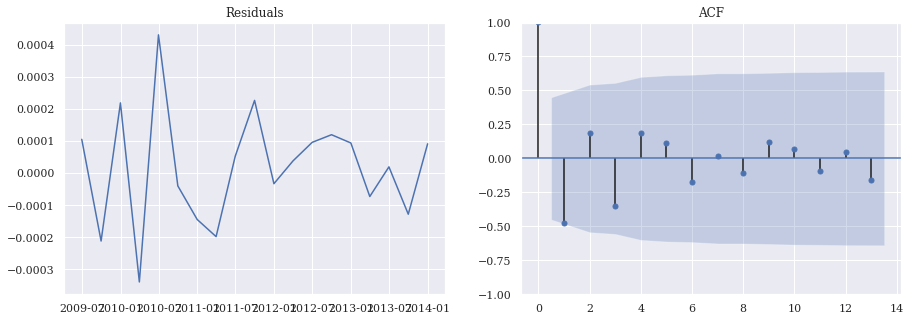


Test statistic for the residuals: -2.506
P-value for the residuals: 0.11392
The residuals are not stationary. We accept the hypothesis of a unit root.



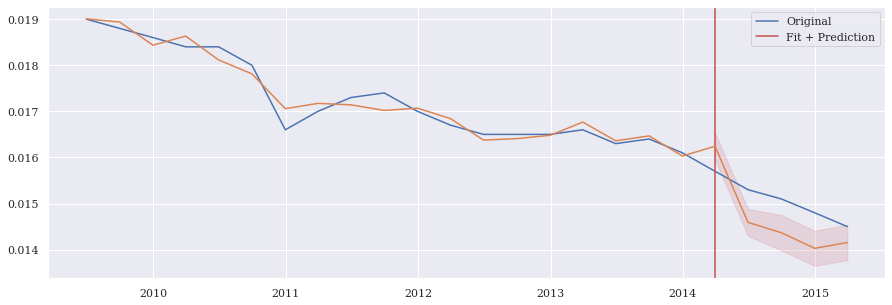

In [35]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_seq_bac

In [66]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"Totale",col_used=cl.col_totale_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y: -5.264
P-value for the series y: 1e-05
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-352.572, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-360.572, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-358.358, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-358.339, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-356.310, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-358.572, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.860 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                        SARIMAX   Log Likelihood                 201.286
Date:        

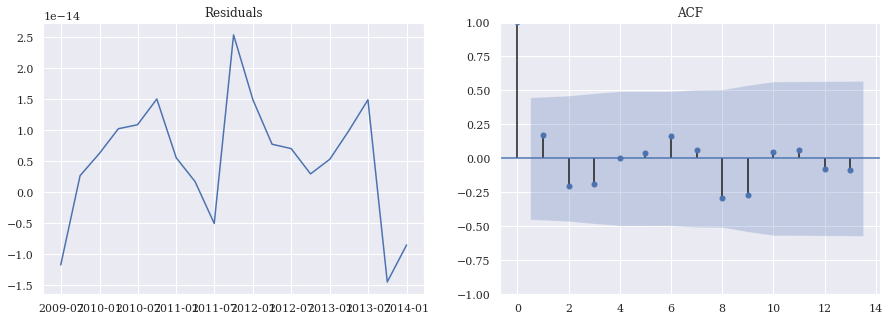


Test statistic for the residuals: -3.439
P-value for the residuals: 0.0097
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 0.



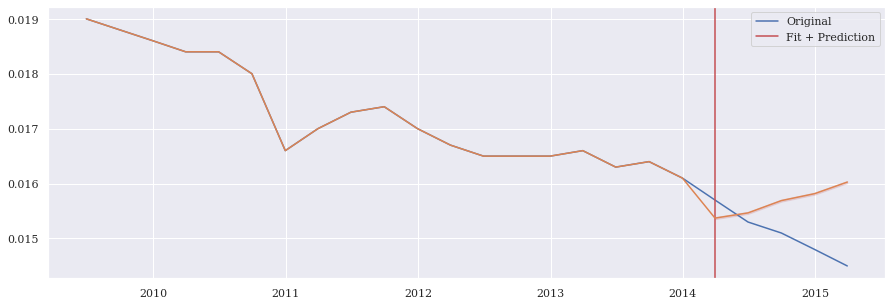

In [67]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

# Focus on chronique CHR2

In [ ]:
start = 2

## With col_totale_corr

In [50]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



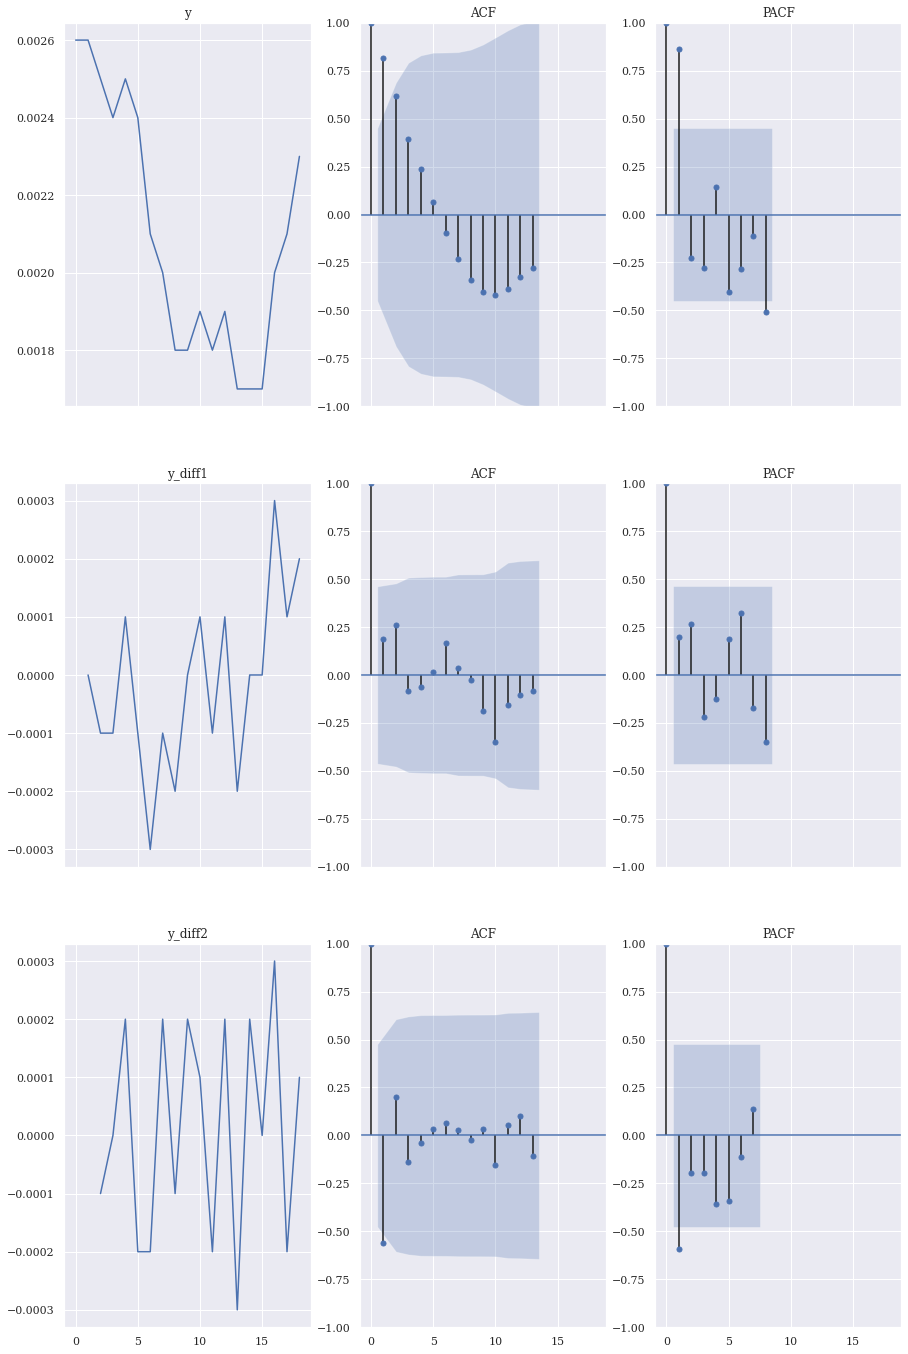

2

In [51]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-186.929, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-239.148, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-242.196, Time=0.23 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-242.788, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-208.934, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-240.058, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-239.060, Time=0.37 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-236.820, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-245.735, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-242.889, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-241.20

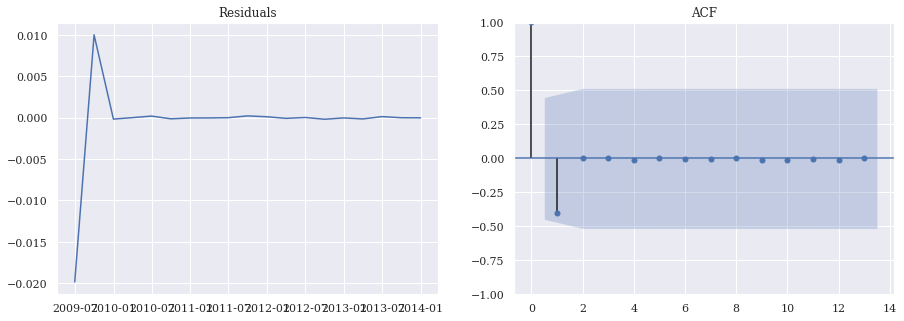


Test statistic for the residuals: -29.75
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



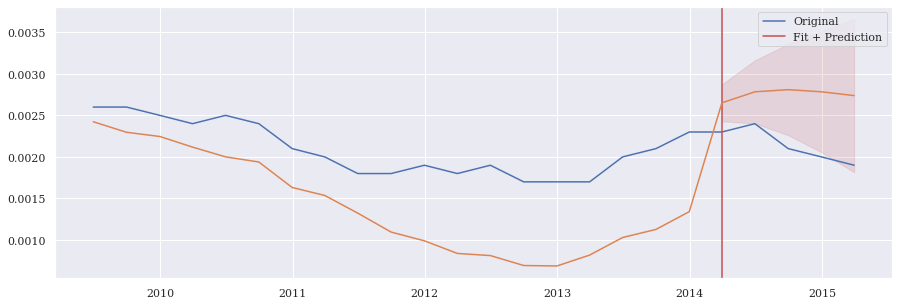

In [52]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

## With col_totale_low_var

In [45]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-277.350, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-285.350, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-283.350, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-283.350, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-287.350, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-281.350, Time=0.32 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.570 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 179.675

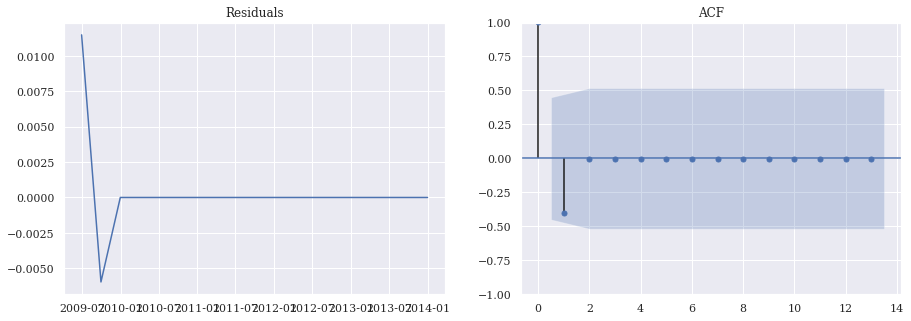


Test statistic for the residuals: -27.716
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



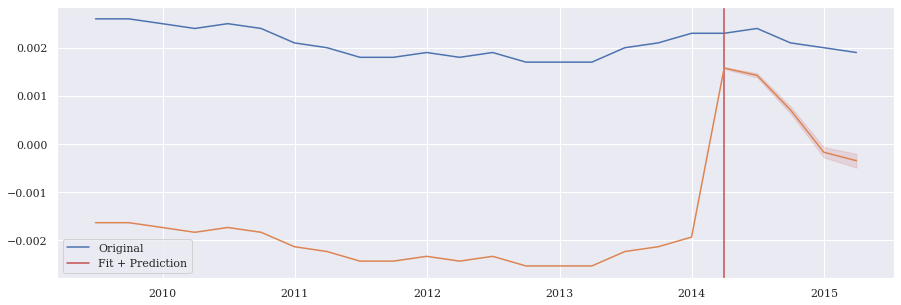

In [46]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_kbest

In [53]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-307.018, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-315.350, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-313.751, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-313.390, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-317.350, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-311.405, Time=0.21 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.171 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 179.675

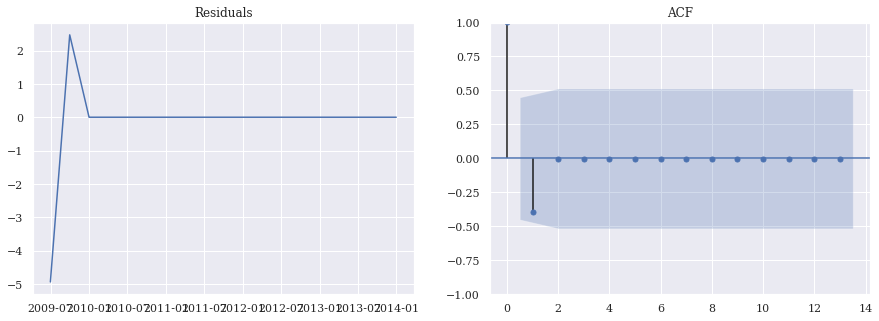


Test statistic for the residuals: -29.224
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



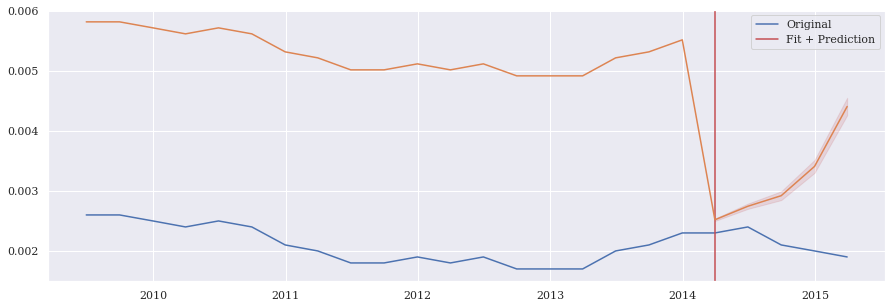

In [54]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_recur

In [55]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-274.243, Time=1.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-286.977, Time=0.31 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-285.971, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-288.631, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-289.539, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-287.399, Time=0.45 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 2.771 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 160.769

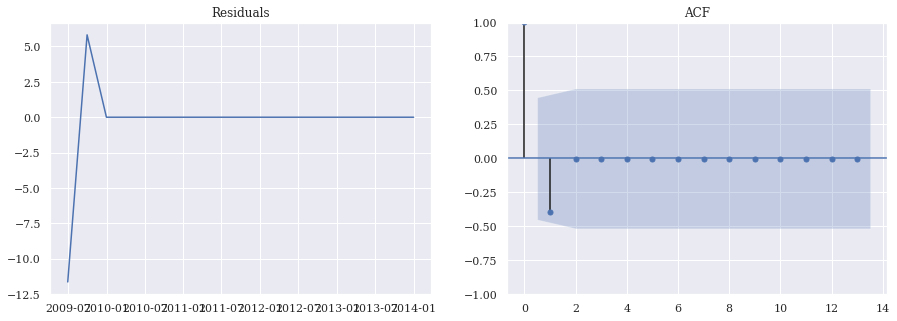


Test statistic for the residuals: -29.227
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



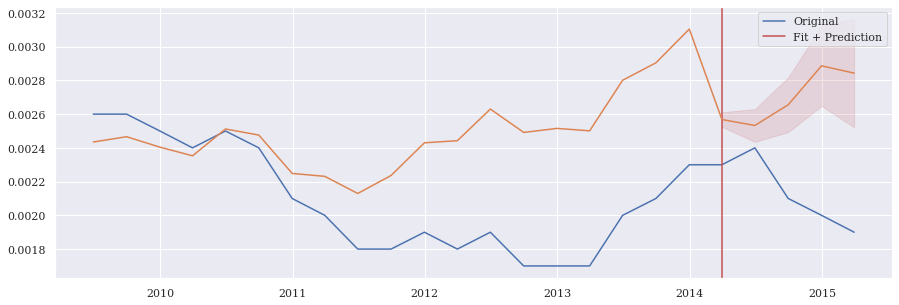

In [56]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_sfm

In [58]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-234.259, Time=0.61 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-274.190, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-277.677, Time=0.46 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-281.540, Time=0.56 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-234.880, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-278.439, Time=0.45 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-269.836, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-267.590, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-258.639, Time=0.13 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 2.862 seconds
                               SARIMAX

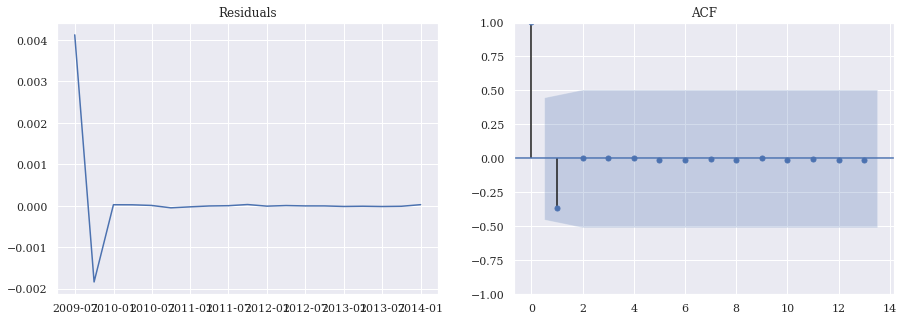


Test statistic for the residuals: -35.629
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



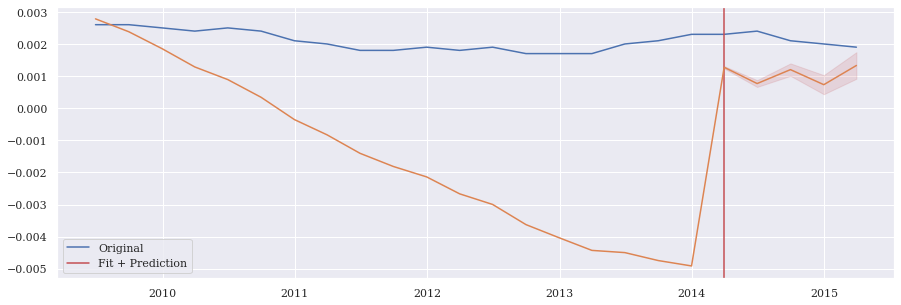

In [59]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_tree

In [60]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-260.247, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-268.939, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-271.389, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-270.325, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-238.101, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-269.364, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-269.303, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-267.457, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-273.679, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-271.234, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-271.26

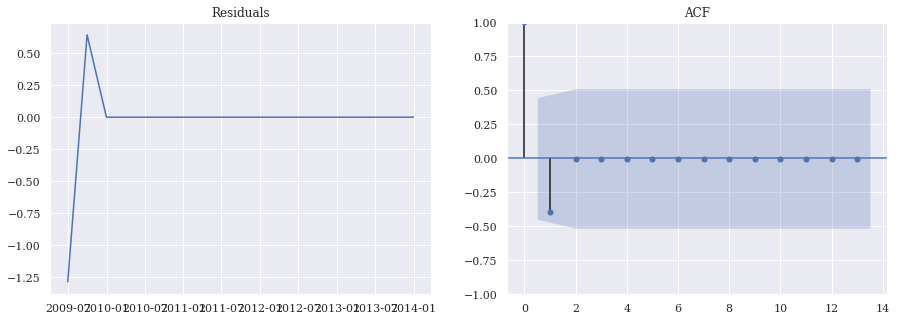


Test statistic for the residuals: -29.246
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



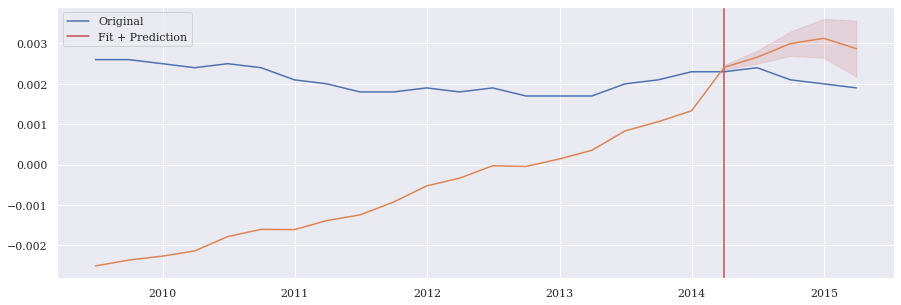

In [61]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_seq_for

In [72]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-215.790, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-230.826, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-231.407, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-233.410, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-199.999, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-230.092, Time=0.19 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-226.393, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-183.880, Time=0.23 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-235.453, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-232.224, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-227.89

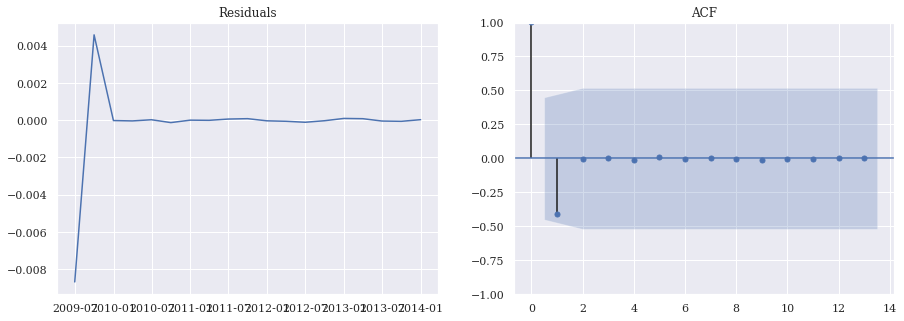


Test statistic for the residuals: -2.892
P-value for the residuals: 0.04628
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



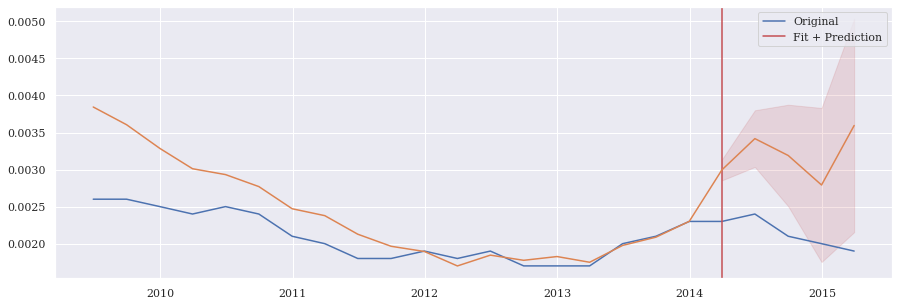

In [73]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_seq_bac

In [74]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR2",col_used=cl.col_2_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff2: -4.628
P-value for the series y_diff2: 0.00011
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-307.350, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-315.350, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-313.350, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-313.350, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-317.350, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-311.350, Time=0.19 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.043 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 179.675

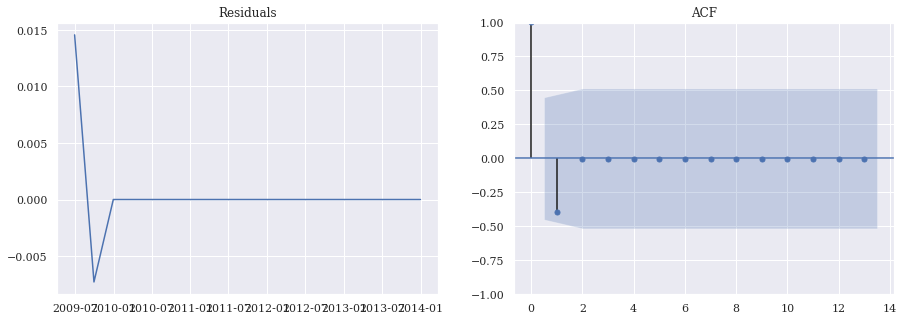


Test statistic for the residuals: -29.182
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 2.



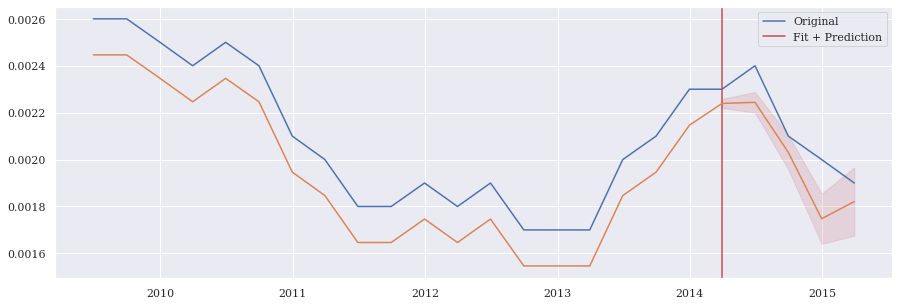

In [75]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

# Focus on chronique CHR8

In [76]:
start = 2

## With col_totale_corr

In [77]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_corr,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



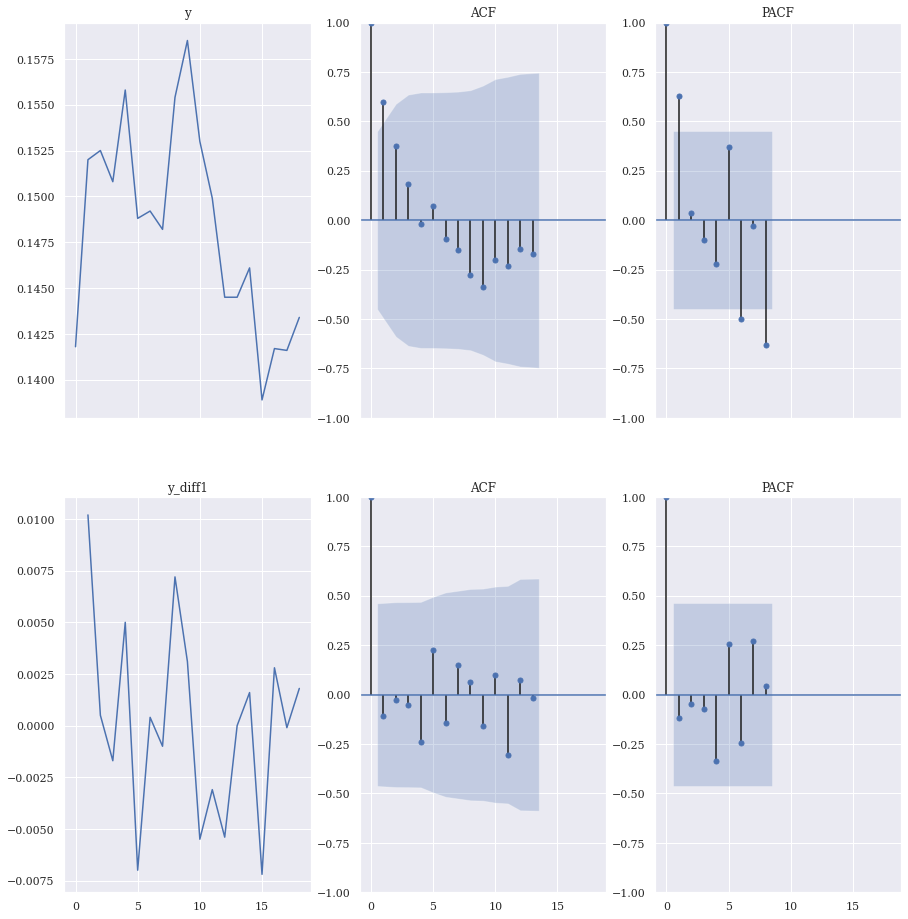

1

In [78]:
acf_pacf(y_train,alpha=0.05)


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-112.356, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-136.936, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-134.330, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-134.053, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-103.836, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-131.974, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.720 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  76.468
Dat

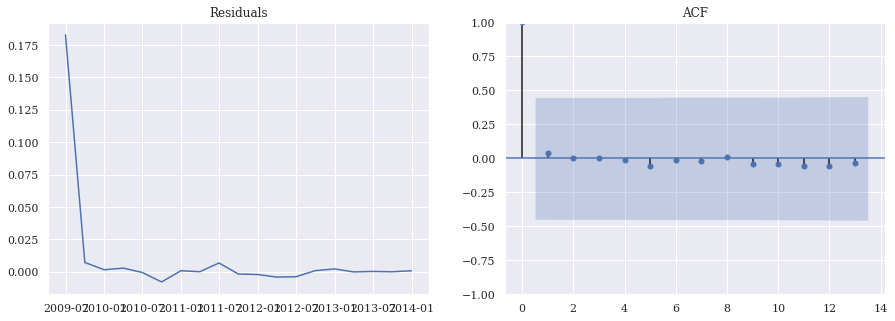


Test statistic for the residuals: -2.966
P-value for the residuals: 0.03822
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



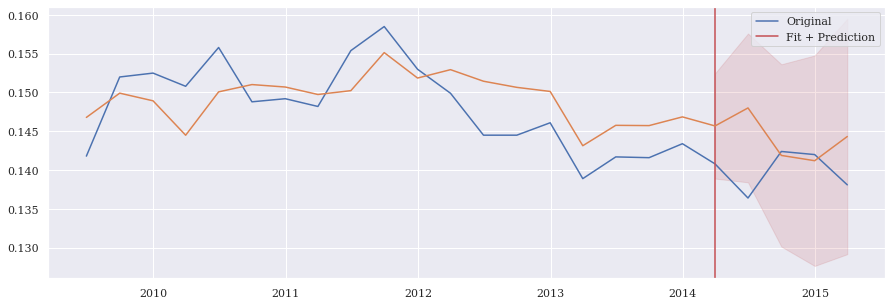

In [79]:
model = find_arimax_params(y_train,exog=X_train)
plot_arimax_fit(model,y_train,y_test=y_test,exog_train=X_train,exog_test=X_test)

## With col_totale_low_var

In [82]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_low_var,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-282.394, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-290.196, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-288.831, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-288.721, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-292.196, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-286.708, Time=0.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.628 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 180.098
Dat

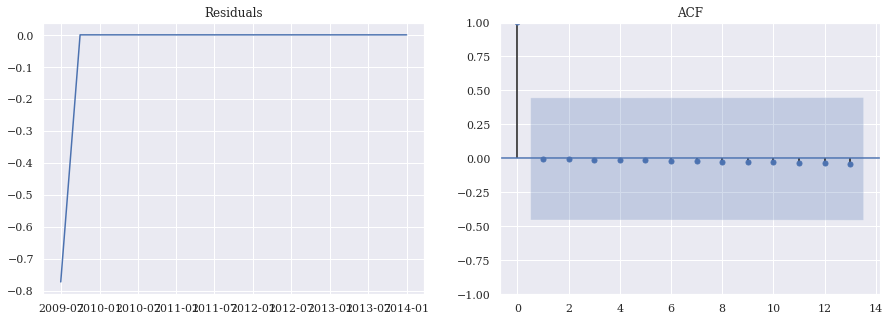


Test statistic for the residuals: -238476771232516.97
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



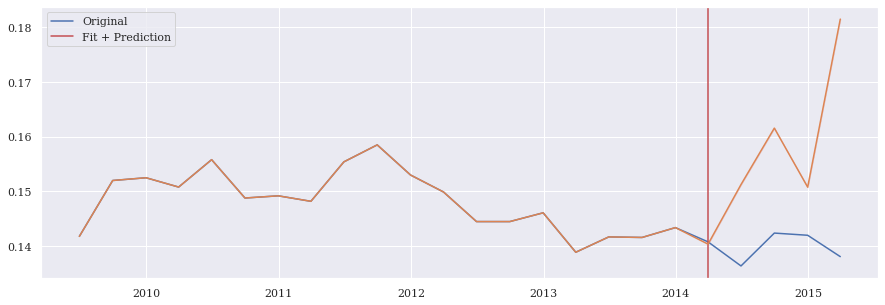

In [83]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_kbest

In [84]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_kbest,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-308.037, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-316.196, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-313.772, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-313.678, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-318.196, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-311.671, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.175 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 180.098
Dat

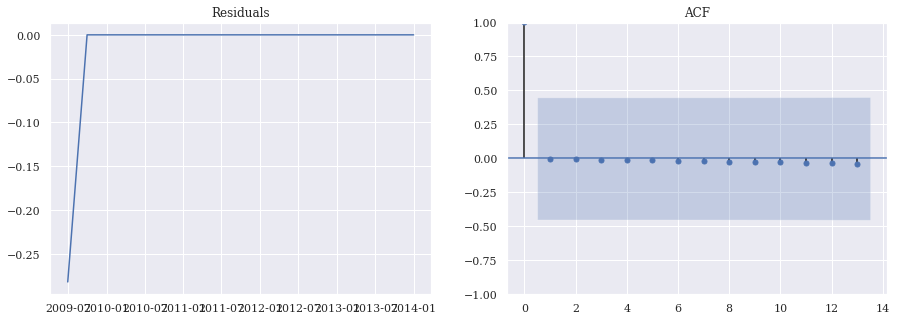


Test statistic for the residuals: -3.474
P-value for the residuals: 0.00867
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



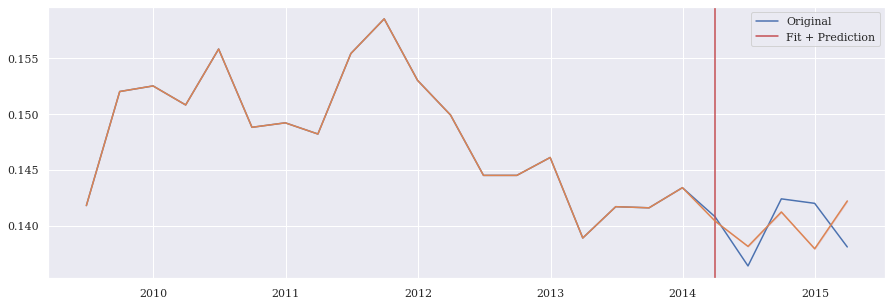

In [85]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_recur

In [86]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_recur,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-163.241, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-144.860, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-147.059, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-147.228, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-144.943, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-138.497, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-162.531, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-143.068, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-158.535, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-147.578, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-153.575, T

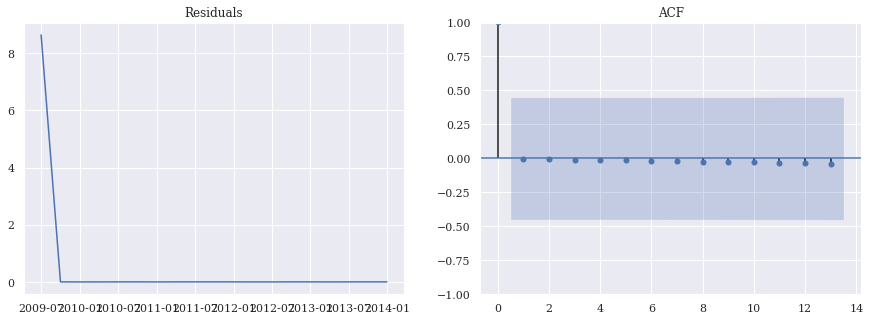


Test statistic for the residuals: -1.53
P-value for the residuals: 0.51884
The residuals are not stationary. We accept the hypothesis of a unit root.



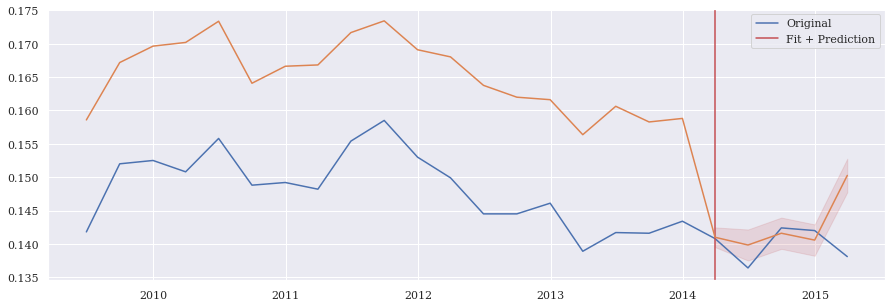

In [87]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_sfm

In [88]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_sfm,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-304.196, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-312.196, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-310.196, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-310.196, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-314.196, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-308.196, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.133 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 180.098
Dat

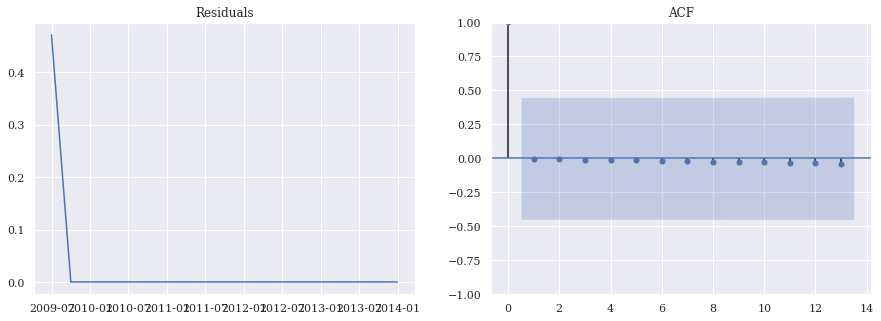


Test statistic for the residuals: -4204779327852347.0
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



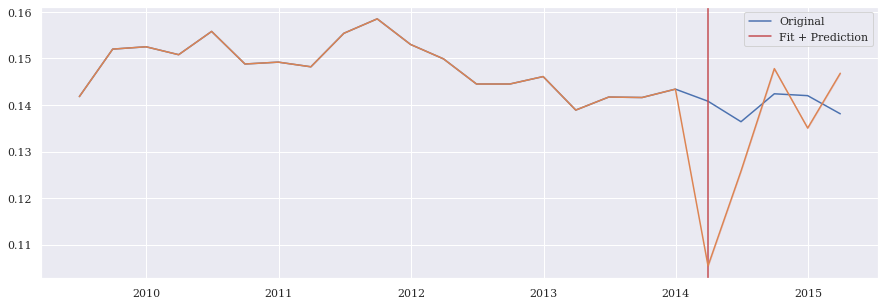

In [89]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_tree

In [90]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_tree,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-304.606, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-312.196, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-309.815, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-309.901, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-314.196, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-307.900, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.596 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 180.098
Dat

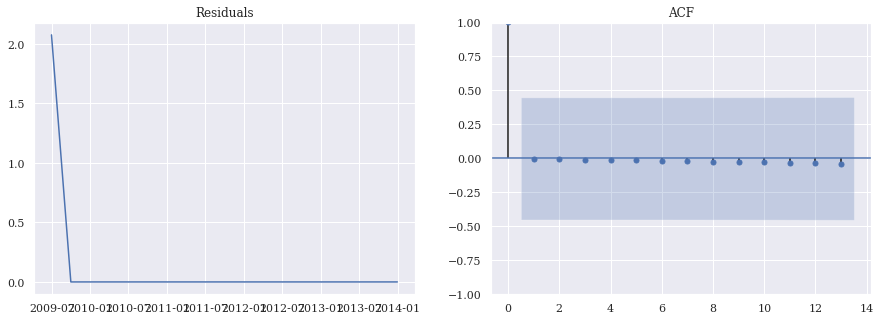


Test statistic for the residuals: -3.146
P-value for the residuals: 0.02331
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



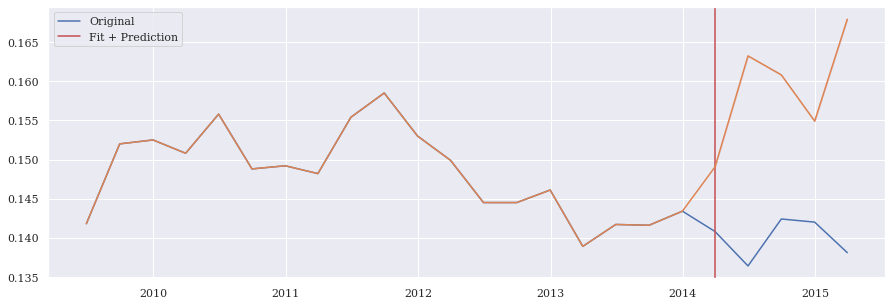

In [91]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_seq_for

In [92]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_seq_for,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-308.464, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-316.196, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-313.999, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-313.882, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-318.196, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-311.929, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.399 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 180.098
Dat

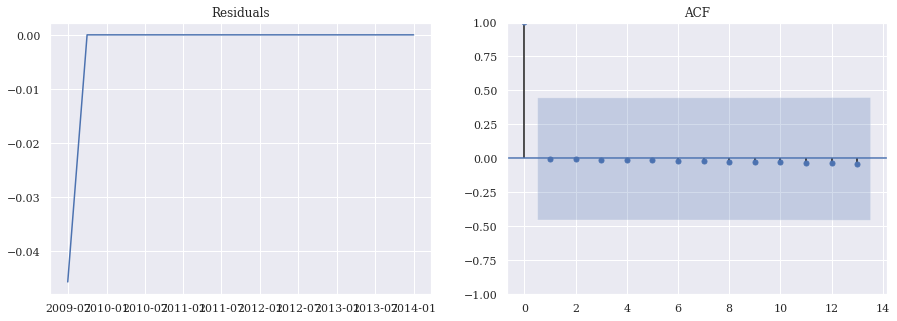


Test statistic for the residuals: -10226544130773.924
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



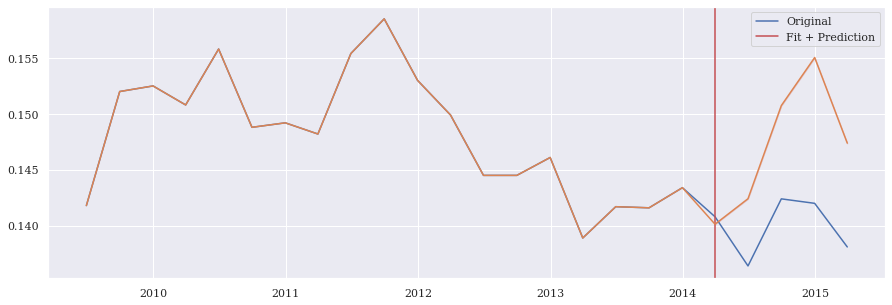

In [93]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)

## With col_totale_seq_bac

In [94]:
X_train, X_test, y_train, y_test = clean_data(data,start,b"CHR8",col_used=cl.col_8_seq_bac,split=0.2,norm='Not')
y_total = pd.concat([y_train,y_test])


Test statistic for the series y_diff1: -7.795
P-value for the series y_diff1: 0.0
The data is potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-308.306, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-316.196, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-314.062, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-314.133, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-318.196, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-312.394, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.532 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 180.098
Dat

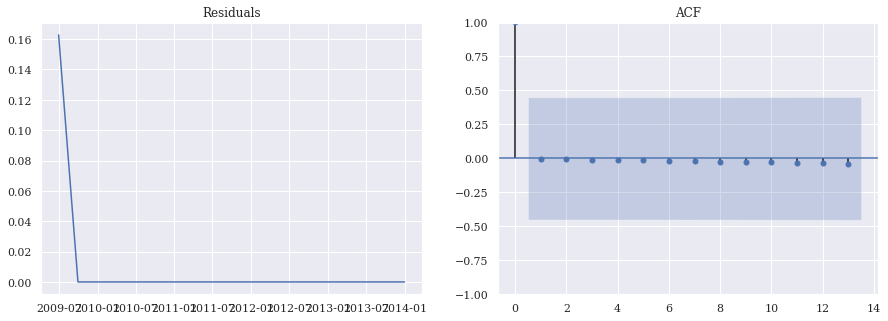


Test statistic for the residuals: -28561413425274.99
P-value for the residuals: 0.0
The residuals are potentially stationary. We reject the hypothesis of a unit root.
The level of differencing you need to use in order to have stationarity data is 1.



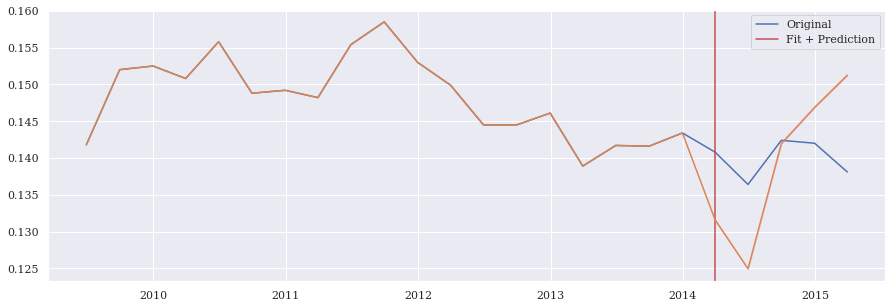

In [95]:
model = find_arimax_params(y_train,X_train)
plot_arimax_fit(model,y_train,y_test,X_train,X_test)